Downloaded dataset files are in: /kaggle/input/tabular-dataset-ready-for-malicious-url-detection
Train dataset shape: (6728848, 60)
Test dataset shape: (1682213, 60)


,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0


,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,spa-security.de,0,dmoz_harvard,0,0,0,0,0,0,15,...,0,0,0,0,2,de,0,7,0,0
1,mallander.de,0,majestic_million,0,0,0,0,0,0,12,...,0,0,0,0,2,de,0,3,0,0
2,zzndb.com.cn,0,alexatop1m,0,0,0,0,0,0,12,...,0,0,0,0,6,com.cn,0,3,0,0
3,enviroseal.com/,0,data_clean_train_mendel,0,0,0,0,0,0,15,...,0,0,0,0,3,com,0,6,0,0
4,hunt1ngtonbank.3utilities.com,1,ALL-phishing-domains,0,0,0,0,0,0,29,...,0,0,0,0,3,com,0,6,14,0


Cross-validation AUC scores: [0.94405741 0.9443439  0.94380153 0.94427361 0.94381937]
Mean AUC: 0.94 (+/- 0.00)


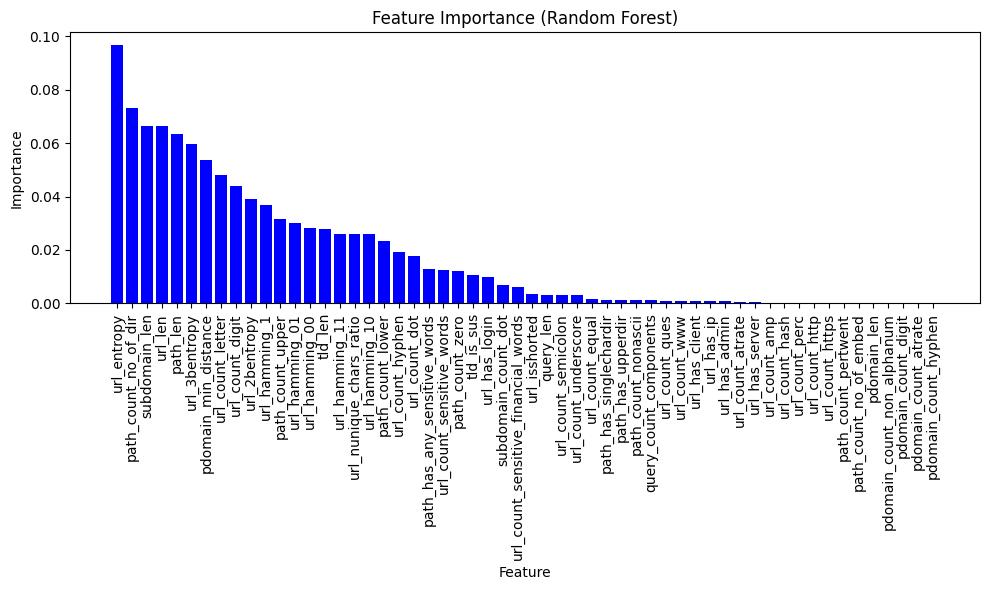

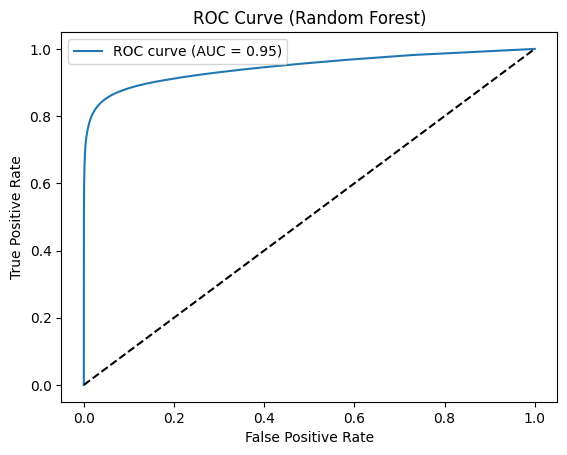

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96   1320794
           1       0.93      0.80      0.86    361419

    accuracy                           0.94   1682213
   macro avg       0.94      0.89      0.91   1682213
weighted avg       0.94      0.94      0.94   1682213



In [1]:
# 1. Download and Load Dataset
!pip install kagglehub

import kagglehub
import os
import pandas as pd

# Download the dataset from KaggleHub
download_path = kagglehub.dataset_download("pilarpieiro/tabular-dataset-ready-for-malicious-url-detection")
print("Downloaded dataset files are in:", download_path)

# Define paths to the CSV files directly from download_path
train_csv = os.path.join(download_path, "train_dataset.csv")
test_csv = os.path.join(download_path, "test_dataset.csv")

# Check if the files exist to prevent errors
if not os.path.exists(train_csv):
    print(f"Error: Train CSV not found at {train_csv}")
if not os.path.exists(test_csv):
    print(f"Error: Test CSV not found at {test_csv}")

# Load the datasets into pandas DataFrames
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

# Display dataset shapes and first few rows
print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)
display(df_train.head())
display(df_test.head())

# 2. Train and Evaluate a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare features and labels
# Drop non-numeric columns ('url', 'source', 'tld') and the target ('label')
X_train = df_train.drop(columns=['url', 'label', 'source', 'tld'])
y_train = df_train['label']
X_test = df_test.drop(columns=['url', 'label', 'source', 'tld'])
y_test = df_test['label']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Feature Importance Plot
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color='blue')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ROC Curve
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend(loc="best")
plt.show()

# Classification Report
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))